# Explore flight delay data wrt day of week

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

# Load data

In [2]:
# Import custom code
from flightdelay.fld import io as flio
airlines_df, airports_df, flights_df = flio.load_data()

In [3]:
# Filter data to keys of interest
keys = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
flights_df = flights_df[keys]

In [4]:
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

# Determine number of flights for the origin airport
Nflights_orig = np.zeros(len(airport_inverse))
for i in range(len(all_airports)):
    Nflights_orig[np.where(airport_inverse==i)] = airport_count[i]
    
flights_df = flights_df.loc[flights_df.index[Nflights_orig>=7300]]

In [5]:
# Remove cancelled flights
flights_df = flights_df.dropna()
flights_df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [6]:
# Separate data by airport
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

airport_dfs = {}
for k in all_airports:
    airport_dfs[k] = flights_df[flights_df['ORIGIN_AIRPORT']==k]

# General exploration function

Input:
    Analysis type
    Mean_by_group
    plot_quantiles
    Output:


In [7]:
airport_dfs['SAN']

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
477,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,...,631.0,121.0,115.0,89.0,626,900.0,6.0,916,906.0,-10.0
500,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,...,630.0,52.0,48.0,25.0,109,655.0,7.0,707,702.0,-5.0
517,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,...,638.0,295.0,272.0,248.0,2295,1346.0,6.0,1415,1352.0,-23.0
518,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,...,634.0,250.0,224.0,200.0,1728,1154.0,7.0,1230,1201.0,-29.0
520,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,...,636.0,145.0,138.0,110.0,853,926.0,10.0,945,936.0,-9.0
521,1,1,4,UA,1568,N24212,SAN,EWR,620,615.0,...,633.0,320.0,283.0,253.0,2425,1346.0,12.0,1440,1358.0,-42.0
525,1,1,4,AA,1390,N496AA,SAN,DFW,620,612.0,...,639.0,185.0,169.0,138.0,1171,1057.0,4.0,1125,1101.0,-24.0
582,1,1,4,DL,1592,N723TW,SAN,ATL,629,628.0,...,644.0,241.0,223.0,202.0,1892,1306.0,5.0,1330,1311.0,-19.0
595,1,1,4,US,567,N524UW,SAN,PHX,630,623.0,...,640.0,83.0,97.0,48.0,304,828.0,32.0,853,900.0,7.0
601,1,1,4,AS,499,N551AS,SAN,SEA,630,627.0,...,643.0,180.0,174.0,145.0,1050,908.0,13.0,930,921.0,-9.0


In [15]:
# Plot mean flight delay for all months for multiple airports
import util
analysis_fn = util.relation_mean
#aps = ['SAN','LAX','SEA','LGA','ORD','MIA']
aps = ['JFK','AUS','HOU','DEN','MSP']
y_by_x_mean = {}
for ap in aps:
    y_by_x_mean[ap] = util.relation_explorer(airport_dfs[ap], 'DEPARTURE_DELAY', 'DAY_OF_WEEK',analysis_fn = analysis_fn,make_plot=False)

In [16]:
def getcmaprgb(N, cmap):
	"""Get the RGB values of N colors across a colormap"""
	return cmap(np.linspace(0,255,N).astype(int))

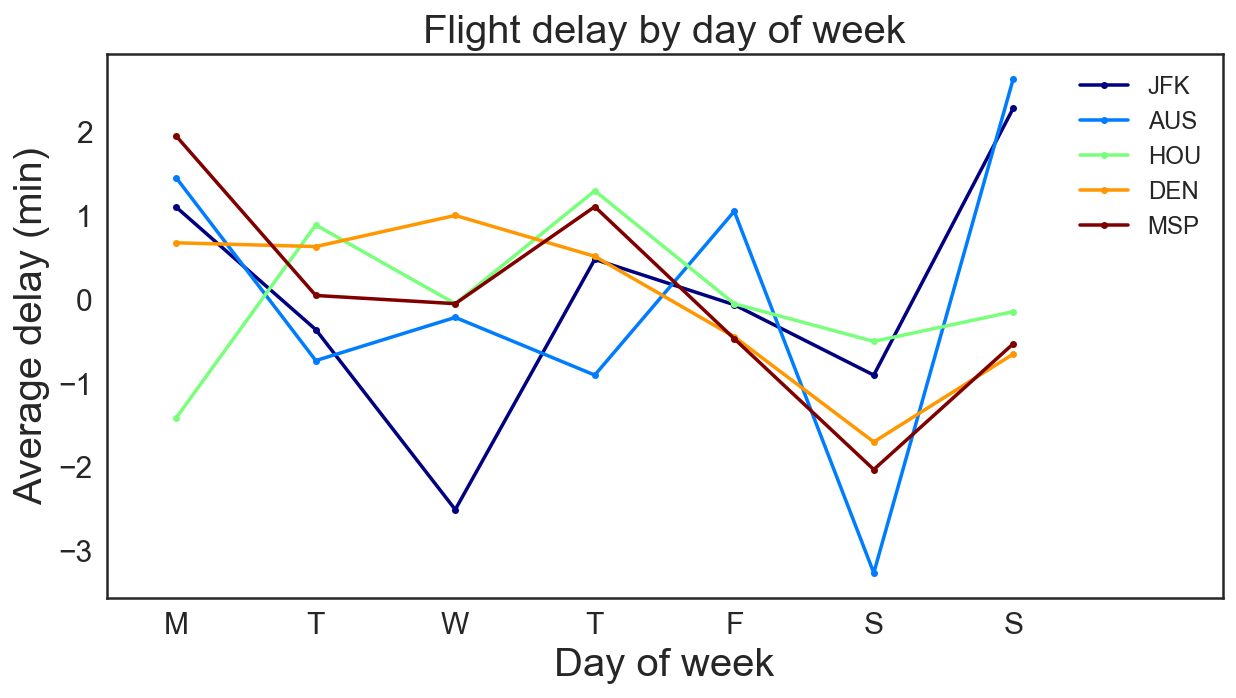

In [17]:
from matplotlib import cm
colors = getcmaprgb(len(aps),cm.jet)

plt.figure(figsize=(10,5))    
for i, ap in enumerate(aps):
    plt.plot(np.arange(1,8),y_by_x_mean[ap] - np.mean(y_by_x_mean[ap]),'.-',color=colors[i],label=ap)
plt.xlabel('Day of week',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.title('Flight delay by day of week',size=20)
plt.xlim((.5,8.5))
plt.yticks(size=15)
plt.xticks(np.arange(1,8),['M','T','W','T','F','S','S'],size=15)
plt.legend(loc='best',fontsize=12)

# Flight delay by day of week and number of flights

In [30]:
np.mean(flights_df['DEPARTURE_DELAY']>15)

0.18044638696903301

            DEPARTURE_DELAY                  
                       mean   count       sem
DAY_OF_WEEK                                  
1                 10.985303  773487  0.044883
2                  9.321313  760505  0.041512
3                  8.769701  775284  0.039242
4                 10.166103  788270  0.041117
5                  9.677052  782379  0.039787
6                  7.957177  632447  0.044197
7                  9.582467  737154  0.042921
(0.71396164220999303, 0.07153228279214606)


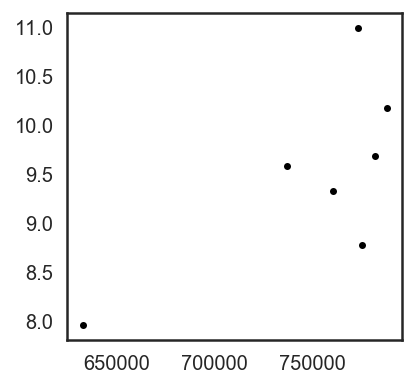

In [31]:
gbm = flights_df[['DAY_OF_WEEK','DEPARTURE_DELAY']].groupby('DAY_OF_WEEK')
gbm_mean = gbm.agg(['mean','count','sem'])
print(gbm_mean)

delay_means = gbm_mean['DEPARTURE_DELAY']['mean'].values
flight_counts = gbm_mean['DEPARTURE_DELAY']['count'].values
plt.figure(figsize=(3,3))
plt.plot(flight_counts,delay_means,'k.')
print(sp.stats.pearsonr(flight_counts,delay_means))

In [32]:
g = gbm_mean['DEPARTURE_DELAY']['count'].values / np.sum(gbm_mean['DEPARTURE_DELAY']['count'])
print(g)

[ 0.14734416  0.14487118  0.14768648  0.15016022  0.14903803  0.12047697
  0.14042296]


([<matplotlib.axis.XTick at 0x1586ac748>,
 <a list of 7 Text xticklabel objects>)

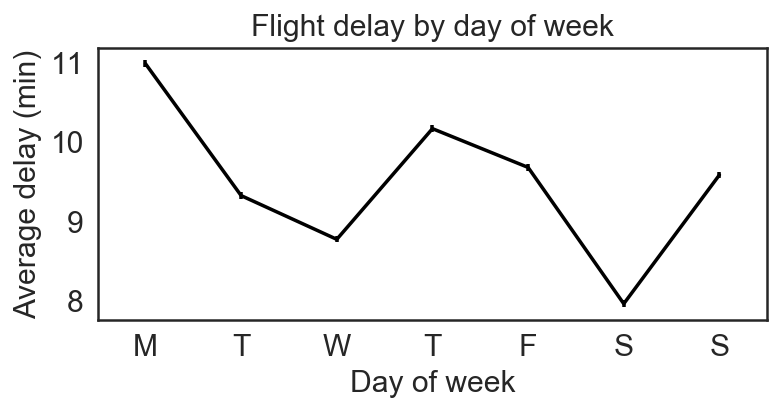

In [33]:
plt.figure(figsize=(6,2.5))    
plt.errorbar(np.arange(1,8),delay_means,color='k',yerr=gbm_mean['DEPARTURE_DELAY']['sem'].values)
plt.xlabel('Day of week',size=15)
plt.ylabel('Average delay (min)', size=15)
plt.title('Flight delay by day of week',size=15)
plt.xlim((.5,7.5))
plt.yticks(size=15)
plt.xticks(np.arange(1,8),['M','T','W','T','F','S','S'],size=15)

(0.83334855309235101, 0.01986368772308808)


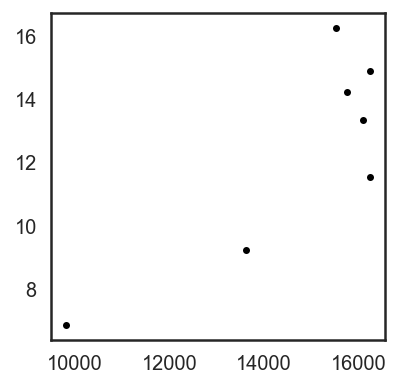

In [27]:
ap='LGA'
gbm = airport_dfs[ap][['DAY_OF_WEEK','DEPARTURE_DELAY']].groupby('DAY_OF_WEEK')
gbm_mean = gbm.agg(['mean','count'])
gbm_mean

delay_means = gbm_mean['DEPARTURE_DELAY']['mean'].values
flight_counts = gbm_mean['DEPARTURE_DELAY']['count'].values
plt.figure(figsize=(3,3))
plt.plot(flight_counts,delay_means,'k.')
print(sp.stats.pearsonr(flight_counts,delay_means))